<a href="https://colab.research.google.com/github/Felixe360/Module-3-Assignments/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod import families
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score, log_loss
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score

In [26]:
import pandas as pd

df = pd.read_csv("/content/encoded_df_final.csv")
display(df.head())

# Change data type (these behave more like categorical variables)
df['RepNumber'] = df['RepNumber'].astype('category')
df['WeekOfMonth'] = df['WeekOfMonth'].astype('category')
df['WeekOfMonthClaimed'] = df['WeekOfMonthClaimed'].astype('category')
df['DriverRating'] = df['DriverRating'].astype('category')


,WeekOfMonth,WeekOfMonthClaimed,Sex,Age,RepNumber,DriverRating,FraudFound,Age2,age_gender,Month_Aug,...,AddressChange-Claim_2 to 3 years,AddressChange-Claim_4 to 8 years,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,5,1,0,21,12,1,0,441,0,False,...,False,False,False,False,False,True,False,False,False,True
1,3,4,1,34,15,4,0,1156,34,False,...,False,False,True,False,False,False,False,False,True,False
2,5,2,1,47,7,3,0,2209,47,False,...,False,False,True,False,False,False,False,False,True,False
3,2,1,1,65,4,2,0,4225,65,False,...,False,False,True,False,False,False,False,False,False,True
4,5,2,0,27,3,1,0,729,0,False,...,False,False,True,False,False,False,False,False,True,False


In [27]:
# One-hot encode the categorical variables
encode_list = ['RepNumber', 'WeekOfMonth', 'WeekOfMonthClaimed', 'DriverRating']
df = pd.get_dummies(df, columns=encode_list, drop_first=True)
display(df.head())

,Sex,Age,FraudFound,Age2,age_gender,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,WeekOfMonth_3,WeekOfMonth_4,WeekOfMonth_5,WeekOfMonthClaimed_2,WeekOfMonthClaimed_3,WeekOfMonthClaimed_4,WeekOfMonthClaimed_5,DriverRating_2,DriverRating_3,DriverRating_4
0,0,21,0,441,0,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,1,34,0,1156,34,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,True
2,1,47,0,2209,47,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
3,1,65,0,4225,65,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,27,0,729,0,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False


In [30]:

# Split the data into training and testing sets
Y= df['FraudFound']
X= df.drop(columns='FraudFound')

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Lasso

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, accuracy_score, log_loss

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define a range of C values to try (C is the inverse of alpha in scikit-learn)
# Smaller C means stronger regularization (similar to larger alpha in statsmodels)
Cs =  np.random.uniform(0.1, 10, size=10)

best_C = None
best_metric_value = float('inf') # Initialize with infinity to find the minimum log loss
best_model = None

# Iterate through different C values
for C in Cs:
    # Define the Logistic Regression model with L1 penalty (Lasso)
    # solver='liblinear' is a good choice for small datasets and L1 penalty
    # penalty='l1' specifies Lasso regularization
    model = LogisticRegression(C=C, penalty='l1', solver='liblinear', random_state=42)

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
    Y_pred_class = model.predict(X_test) # Get predicted class labels

    # Calculate evaluation metrics
    # RMSE is not typical for logistic regression, using log loss and AUC instead
    logloss = log_loss(Y_test, Y_pred_proba)
    auc = roc_auc_score(Y_test, Y_pred_proba)
    accuracy = accuracy_score(Y_test, Y_pred_class)


    print(f"C: {C}, Log Loss: {logloss:.4f}, AUC: {auc:.4f}, Accuracy: {accuracy:.4f}")

    # Check if this C gives a lower log loss (or higher AUC/accuracy depending on your preference)
    # Here we minimize log loss
    if logloss < best_metric_value:
        best_metric_value = logloss
        best_C = C
        best_model = model


# Print the best C and its corresponding log loss
print(f"\nBest C: {best_C}")
print(f"Lowest Log Loss: {best_metric_value:.4f}")

# You can access the best model using best_model
if best_model:
    print("\nCoefficients of the best model:")
    # print(best_model.coef_) # This might be a large array
    print(f"Number of non-zero coefficients: {np.sum(best_model.coef_ != 0)}")

C: 4.014781938608659, Log Loss: 0.1824, AUC: 0.7909, Accuracy: 0.9433
C: 3.6487540357288815, Log Loss: 0.1824, AUC: 0.7910, Accuracy: 0.9433
C: 6.1646752195376076, Log Loss: 0.1824, AUC: 0.7904, Accuracy: 0.9436
C: 9.581742564372123, Log Loss: 0.1825, AUC: 0.7913, Accuracy: 0.9433
C: 6.059360035436963, Log Loss: 0.1824, AUC: 0.7907, Accuracy: 0.9433
C: 7.8344012840908555, Log Loss: 0.1824, AUC: 0.7903, Accuracy: 0.9436
C: 4.684164388555129, Log Loss: 0.1824, AUC: 0.7908, Accuracy: 0.9433
C: 1.5827815158955083, Log Loss: 0.1822, AUC: 0.7909, Accuracy: 0.9433
C: 8.498917424434763, Log Loss: 0.1824, AUC: 0.7904, Accuracy: 0.9436
C: 0.3970019526591496, Log Loss: 0.1824, AUC: 0.7872, Accuracy: 0.9436

Best C: 1.5827815158955083
Lowest Log Loss: 0.1822

Coefficients of the best model:
Number of non-zero coefficients: 102


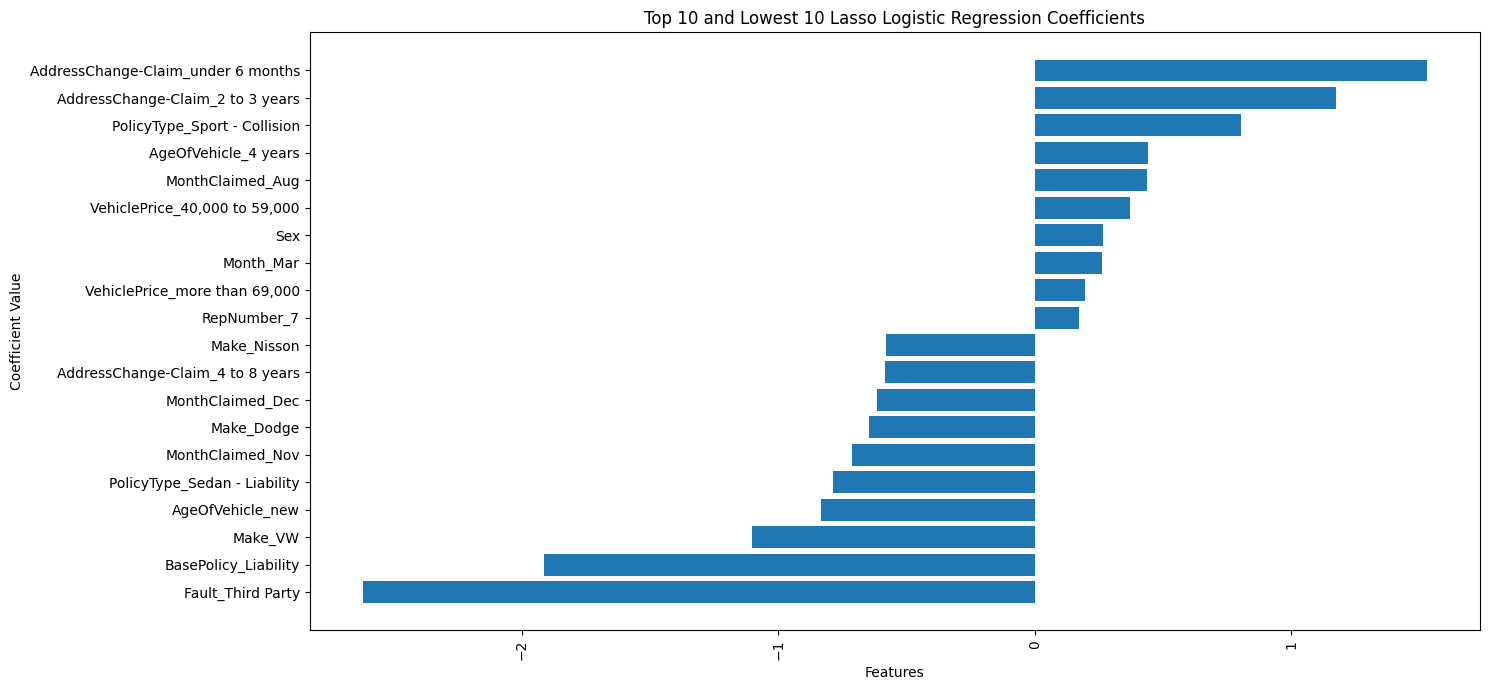

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get the coefficients from the best model
coefficients = best_model.coef_[0]

# Get the names of the features
feature_names = X_train.columns

# Create a pandas Series for easier sorting
coef_series = pd.Series(coefficients, index=feature_names)

# Sort the coefficients
sorted_coefs = coef_series.sort_values()

# Get the top 10 and lowest 10 coefficients
top_10_coefs = sorted_coefs.tail(10)
lowest_10_coefs = sorted_coefs.head(10)

# Combine the top 10 and lowest 10 for plotting
combined_coefs = pd.concat([lowest_10_coefs, top_10_coefs])

# Create a bar plot of the top 10 and lowest 10 coefficients
plt.figure(figsize=(15, 7))
plt.barh(combined_coefs.index, combined_coefs.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Top 10 and Lowest 10 Lasso Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

In [45]:
coefficients = best_model.coef_[0]

# Get the names of the features
feature_names = X_train.columns

# Identify variables with zero coefficients
zero_coef_vars = feature_names[coefficients == 0]

zero_coef_df = pd.DataFrame({'Variables with Zero Coefficient': zero_coef_vars})

# Display the DataFrame
zero_coef_df

,Variables with Zero Coefficient
0,Month_Aug
1,Month_Dec
2,Make_BMW
3,Make_Ferrari
4,Make_Jaguar
5,Make_Lexus
6,Make_Mecedes
7,Make_Porche
8,Make_Saturn
9,MonthClaimed_Mar


**Lasso Analysis**
- This dataset consists of 34 variables but after encoding all the categorical variables, there are about 120 columns and it would be rational to use a lasso logistic regression to eliminate a few variables (not encoded variables). We won't be droping encoded columns that are part of a variable. For example, 'Make_lexus' is part of the make column and it wont be droped but if there are many encoded 'Make_ ' encoded columns then it may be nessecarry to drop the make column which will include 'Make_lexus'.
- After building the model, it resulted in 21 columns to have coefficents of zero. Many are related to the make of the car and policy type columns and before we drop them, we will analyze them futher with a ridge and elastic net regression to confirm thier non-importance.
- an interesting find was that the vehicle price less than $20,000, and price between $60,000- $69,000 had zero coefficients which was interesting because my theory was that cheap cars would increase the probability of commiting fraud from price of car being correlated with financial stability.



# Ridge regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score


# Define a range of lambda (alpha) values to try
# In scikit-learn's LogisticRegression, the regularization parameter is C, which is the inverse of alpha (lambda)
# So, smaller C means stronger regularization (larger alpha/lambda)
Cs = np.random.uniform(0.1, 10, size=10)

best_C = None
best_metric_value = float('inf') # Initialize with infinity to find the minimum log loss
best_model = None

# Iterate through different C values
for C in Cs:
    # Define the Logistic Regression model with L2 penalty (Ridge)
    # penalty='l2' specifies Ridge regularization
    # solver='liblinear' is a good choice for smaller datasets, but other solvers like 'lbfgs' or 'saga' can also be used with 'l2'
    model = LogisticRegression(C=C, penalty='l2', solver='liblinear', random_state=42)

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
    Y_pred_class = model.predict(X_test) # Get predicted class labels


    # Calculate evaluation metrics
    # Using log loss, AUC, and accuracy for evaluation
    logloss = log_loss(Y_test, Y_pred_proba)
    auc = roc_auc_score(Y_test, Y_pred_proba)
    accuracy = accuracy_score(Y_test, Y_pred_class)

    print(f"C: {C}, Log Loss: {logloss:.4f}, AUC: {auc:.4f}, Accuracy: {accuracy:.4f}")

    # Check if this C gives a lower log loss
    if logloss < best_metric_value:
        best_metric_value = logloss
        best_C = C
        best_model = model

# Print the best C and its corresponding log loss
print(f"\nBest C: {best_C}")
print(f"Lowest Log Loss: {best_metric_value:.4f}")

# You can access the best model using best_model
if best_model:
    print("\nCoefficients of the best model:")
    # Ridge typically doesn't set coefficients to exactly zero
    print(f"Number of non-zero coefficients: {np.sum(best_model.coef_ != 0)}")

C: 0.4894643751399923, Log Loss: 0.1826, AUC: 0.7886, Accuracy: 0.9443
C: 8.391255900267913, Log Loss: 0.1827, AUC: 0.7878, Accuracy: 0.9440
C: 9.153735984294498, Log Loss: 0.1827, AUC: 0.7877, Accuracy: 0.9440
C: 3.224075344939477, Log Loss: 0.1827, AUC: 0.7904, Accuracy: 0.9430
C: 5.31287300462526, Log Loss: 0.1827, AUC: 0.7877, Accuracy: 0.9440
C: 2.792055560589467, Log Loss: 0.1827, AUC: 0.7876, Accuracy: 0.9440
C: 6.842240029843266, Log Loss: 0.1827, AUC: 0.7877, Accuracy: 0.9440
C: 3.280181939427027, Log Loss: 0.1827, AUC: 0.7877, Accuracy: 0.9440
C: 7.98317348996553, Log Loss: 0.1827, AUC: 0.7878, Accuracy: 0.9440
C: 9.428663711334995, Log Loss: 0.1827, AUC: 0.7878, Accuracy: 0.9440

Best C: 0.4894643751399923
Lowest Log Loss: 0.1826

Coefficients of the best model:
Number of non-zero coefficients: 123


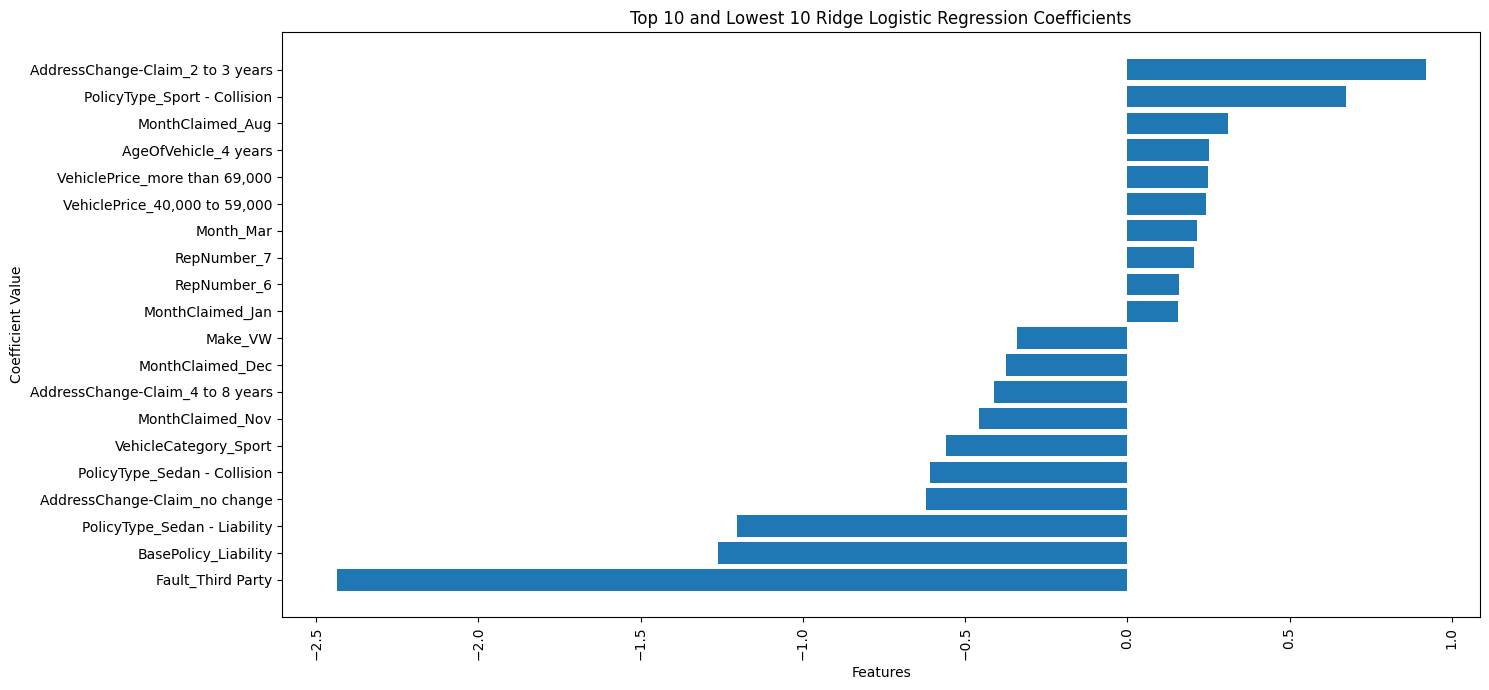

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the coefficients from the best Ridge model
coefficients_ridge = best_model.coef_[0]

# Get the names of the features (assuming they are the same as for the Lasso model)
feature_names = X_train.columns

# Create a pandas Series for easier sorting
coef_series_ridge = pd.Series(coefficients_ridge, index=feature_names)

# Sort the coefficients
sorted_coefs_ridge = coef_series_ridge.sort_values()

# Get the top 10 and lowest 10 coefficients
top_10_coefs_ridge = sorted_coefs_ridge.tail(10)
lowest_10_coefs_ridge = sorted_coefs_ridge.head(10)

# Combine the top 10 and lowest 10 for plotting
combined_coefs_ridge = pd.concat([lowest_10_coefs_ridge, top_10_coefs_ridge])

# Create a bar plot of the top 10 and lowest 10 coefficients
plt.figure(figsize=(15, 7))
plt.barh(combined_coefs_ridge.index, combined_coefs_ridge.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Top 10 and Lowest 10 Ridge Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

**Ridge Regression**

- Builing a Ridge model help prevent overfitting by adding a penatly to the model and will help us learn more information about the data. Lamda is a parameter in this model and for this experiment we randomly selected 10 values to use for the paramter.
- The results showed that fault of third party decreases the probaility of fraud. This makes sense because indivuals who are not at fault have no incentinve to commit fraud and most likely will get a payout from the third party insurance.

- Also, RepNumber 6 and 7 both have positive coefficient indicating that these reps are enrolling individuals that are likely to commit fraud. It could be coincidence but will have to try other models to possible check that claim or representatives.

# Elastic Net Regression

In [36]:
# Define ranges to sample from
alpha_range = (0.0001, 10)      # Sample alpha from this range (log scale)
l1_ratio_range = (0.0, 1.0)     # Sample l1_ratio uniformly from this range

# Random search settings
n_iterations = 10  # Number of random combinations

# Track the best model
best_alpha = None
best_l1_ratio = None
best_metric_value = float('inf')
best_model = None

# Run random search
for i in range(n_iterations):
    # Sample alpha (lambda) and l1_ratio randomly
    alpha = 10 ** np.random.uniform(np.log10(alpha_range[0]), np.log10(alpha_range[1]))  # log scale
    l1_ratio = np.random.uniform(*l1_ratio_range)  # uniform between 0 and 1

    # Create model with elastic net penalty
    model = LogisticRegression(
        penalty='elasticnet',
        solver='saga',
        C=1 / alpha,
        l1_ratio=l1_ratio,
        random_state=42,
        max_iter=1000
    )

    # Fit model
    model.fit(X_train, Y_train)

    # Predict probabilities and classes
    Y_pred_proba = model.predict_proba(X_test)[:, 1]
    Y_pred_class = model.predict(X_test)

    # Compute evaluation metrics
    logloss = log_loss(Y_test, Y_pred_proba)
    auc = roc_auc_score(Y_test, Y_pred_proba)
    accuracy = accuracy_score(Y_test, Y_pred_class)

    print(f"[{i+1}/{n_iterations}] Alpha: {alpha:.5f}, L1 Ratio: {l1_ratio:.3f} | Log Loss: {logloss:.4f}, AUC: {auc:.4f}, Accuracy: {accuracy:.4f}")

    # Keep best model
    if logloss < best_metric_value:
        best_metric_value = logloss
        best_alpha = alpha
        best_l1_ratio = l1_ratio
        best_model = model

# Final report
print(f"\nBest Alpha: {best_alpha:.5f}, Best L1 Ratio: {best_l1_ratio:.3f}")
print(f" Lowest Log Loss: {best_metric_value:.4f}")

if best_model:
    print("\n Coefficients of the best model:")
    print(f"Number of non-zero coefficients: {np.sum(best_model.coef_ != 0)}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[1/10] Alpha: 3.82106, L1 Ratio: 0.143 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[2/10] Alpha: 0.00013, L1 Ratio: 0.653 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[3/10] Alpha: 0.09693, L1 Ratio: 0.905 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[4/10] Alpha: 0.00056, L1 Ratio: 0.289 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[5/10] Alpha: 0.11702, L1 Ratio: 0.462 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[6/10] Alpha: 0.05846, L1 Ratio: 0.423 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[7/10] Alpha: 0.19836, L1 Ratio: 0.326 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[8/10] Alpha: 7.37902, L1 Ratio: 0.049 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[9/10] Alpha: 0.03196, L1 Ratio: 0.939 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450
[10/10] Alpha: 0.01485, L1 Ratio: 0.667 | Log Loss: 0.2144, AUC: 0.5298, Accuracy: 0.9450

Best Alpha: 0.00013, Best L1 Ratio: 0.653
 Lowest Log Loss: 0.2144

 Coefficients of the best model:
Number of non-zero coefficients: 123


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


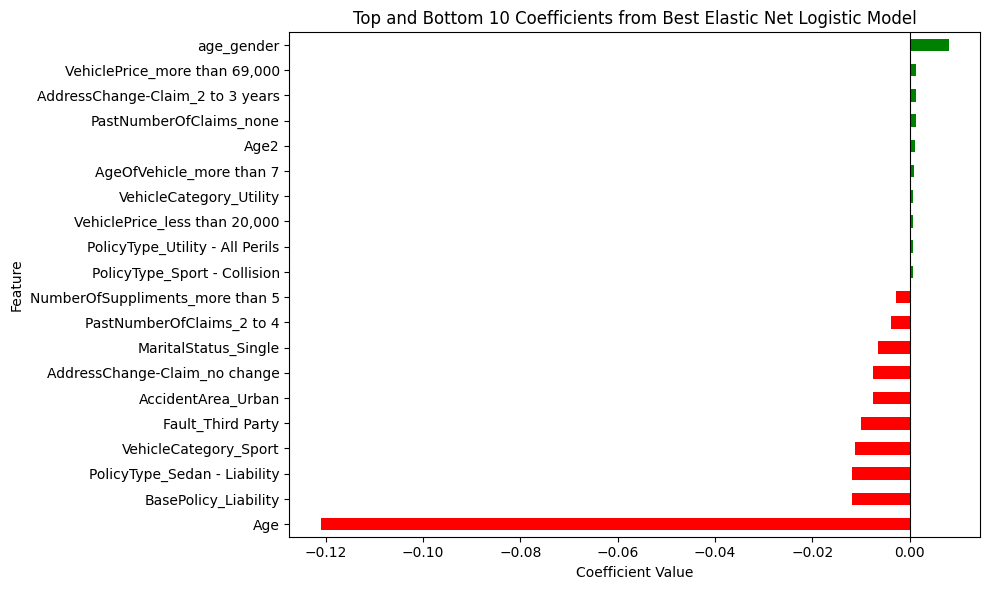

In [37]:
# Make sure you have a trained best_model and feature names
coefs = best_model.coef_.flatten()  # shape: (n_features,)
feature_names = X.columns if hasattr(X, 'columns') else [f"feature_{i}" for i in range(len(coefs))]

# Create a DataFrame to hold feature names and their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})

# Sort by coefficient values
coef_df_sorted = coef_df.sort_values(by='Coefficient')

# Get bottom 10 (most negative) and top 10 (most positive)
bottom_10 = coef_df_sorted.head(10)
top_10 = coef_df_sorted.tail(10)

# Concatenate for plotting
plot_df = pd.concat([bottom_10, top_10])

# Plot
plt.figure(figsize=(10, 6))
colors = plot_df['Coefficient'].apply(lambda x: 'red' if x < 0 else 'green')
plot_df.set_index('Feature')['Coefficient'].plot(kind='barh', color=colors)
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Top and Bottom 10 Coefficients from Best Elastic Net Logistic Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

** Elastic Net**

- The results shows that the biggest positive coefficient is age_gender which increases to probability that an individual commiting fraud. In this case, males are 1 which would indicate as men get older they are more likey to commit fraud than women. But at the same time, age is the biggest negative coefficient and incdicates that as a person gets older the probability of commiting fraud decreases. To conclude, as both men and women get older they are less likely to commit fraud but men have a flatter slope


# Conclusion